In [289]:
import numpy as np
import pandas as pd

from gtda.plotting import plot_point_cloud
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Sample datasets
### Uniform

In [338]:
uniform1D = np.random.uniform(size=[1000,1])
uniform2D = np.random.uniform(size=[1000,2])
uniform3D = np.random.uniform(size=[1000,3])

### Gaussian

In [339]:
gaussian1D = np.random.normal(size=[1000,1])
gaussian2D = np.random.normal(size=[1000,2])
gaussian3D = np.random.normal(size=[1000,3])
#Note: will be truncated to unit hypercube

### Concentric noisy circles

In [340]:
circles1, _ = datasets.make_circles(n_samples=5000, noise=0.00, factor=0.8, random_state=42)
circles2, _ = datasets.make_circles(n_samples=5000, noise=0.05, factor=0.8, random_state=42)
circles3, _ = datasets.make_circles(n_samples=5000, noise=0.30, factor=0.8, random_state=42)
circles4, _ = datasets.make_circles(n_samples=5000, noise=0.80, factor=0.8, random_state=42)

# Computations

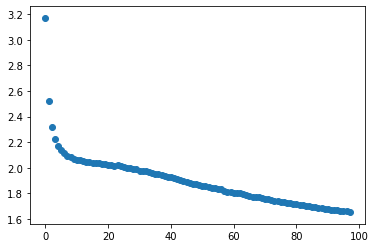

In [361]:
def linearScaleBoxDimension(data, iterations):
    ambientDim = data.shape[1]
    dimArray = []
    for i in range(2,iterations):
        eps = 1/i
        boxes = np.zeros([i+1]*ambientDim)
        for d in data:
            try: boxes[tuple((d/eps).astype(int))] = 1
            except: continue
        Ni = np.sum(boxes)
        dimArray.append(np.log(Ni)/np.log(i))
    return dimArray

def logScaleBoxDimension(data, iterations):
    dimArray = []
    for i in range(1,iterations):
        roundedData = np.around(data, decimals = i)
        Ni = len(np.unique(roundedData, axis=0))
        dims.append(np.log10(Ni)/i)
    return dimArray

def computeBoxDimension(data, iterations, scale='linear'):
    dims = []
    if scale == 'log': dims = logScaleBoxDimension(data, iterations)
    else: dims = linearScaleBoxDimension(data, iterations)
    plt.scatter(np.arange(len(dims)), np.array(dims))
    plt.show
    return dims
    
dims = computeBoxDimension(circles4, 100)

# Plateau detection

91
91 1.6739424071073719


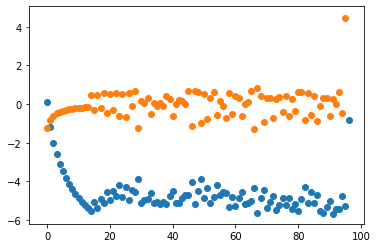

In [363]:
speed = np.abs(np.diff(np.array(dims)))
speed += np.abs(np.resize(np.diff(speed), speed.shape))

#Minimizing absolute sum of first and second discrete derivative, "speed"

loc = np.argmin(speed)
print(loc, dims[loc])

plt.scatter(np.arange(speed.shape[0]), np.log(speed))
plt.scatter(np.arange(speed.shape[0]-1), np.diff(np.log(speed)))
plt.show